### Definição do problema:

Neste projeto, nosso trabalho será avaliar quais atributos influenciam um usuário na compra de produtos online e construir um modelo preditivo para realizar previsões de compras futuras.

Usaremos como fonte de dados o dataset:

Online Shoppers Purchasing Intention Dataset

https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

O conjunto de dados consiste em vetores de recursos pertencentes a 12330 sessões online. O conjunto de dados foi formado de mode que cada sessão pertença a um usuário diferente em um período de 1 ano para evitar qualquer tendência para uma campanha específica, dia especial, usuário, perfil ou período.

O conjunto de dados consiste em 10 atributos numéricos e 8 categóricos. O atributos "Revenue"pode ser usado como o rótulo da classe.

## Importando os Pacotes

In [1]:
# Instala o pacote watermark
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook
!pip install -q -U watermark

In [48]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn import svm
import sklearn
import matplotlib
import warnings
import time
warnings.filterwarnings("ignore")

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

sklearn   : 1.0.2
seaborn   : 0.11.2
matplotlib: 3.5.2
numpy     : 1.21.5
pandas    : 1.4.4



## Carga e Dicionários de dados

In [4]:
# Carregando os dados
df_original = pd.read_csv("/media/sf_MachineLearning/Cap11/dados/online_shoppers_intention.csv")
df_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Dicionário de Dados:

"Administrativo", "Duração administrativa", "Informativo", "Duração informativo", "Relacionado ao produto" e "Duração relacionada ao produto" representam o número de diferentes tipos de páginas visitadas pelo visitante nessa sessão e o tempo total gasto em cada uma dessas categorias de página. Os valores desses recursos são derivados das informações de URL das páginas visitadas pelo usuário e atualizadas em tempo real quando um usuário executa uma ação, por exemplo, passando de uma página para outra. 

Os recursos "Taxa de rejeição", "Taxa de saída" e "Valor da página" representam as métricas medidas pelo "Google Analytics" para cada página no site de comércio eletrônico. 

O valor do recurso "Taxa de rejeição" de uma página da web refere-se à porcentagem de visitantes que entram no site a partir dessa página e saem ("rejeição") sem acionar outras solicitações ao servidor durante essa sessão. 

O valor do recurso "Taxa de saída" para uma página da web específica é calculado como a porcentagem que foi a última na sessão, para todas as exibições de página a página. 

O recurso "Valor da página" representa o valor médio para uma página da web que um usuário visitou antes de concluir uma transação de comércio eletrônico. 

O recurso "Dia especial" indica a proximidade do horário de visita do site a um dia especial específico (por exemplo, dia das mães, dia dos namorados) em que as sessões têm mais probabilidade de serem finalizadas com a transação. O valor desse atributo é determinado considerando a dinâmica do comércio eletrônico, como a duração entre a data do pedido e a data de entrega. Por exemplo, no dia dos namorados, esse valor assume um valor diferente de zero entre 2 e 12 de fevereiro (dia dos namorados nos EUA e Europa), zero antes e depois dessa data, a menos que esteja próximo de outro dia especial e seu valor máximo de 1 em 8 de fevereiro. 

O conjunto de dados também inclui o tipo de sistema operacional, navegador, região, tipo de tráfego, tipo de visitante como visitante novo ou recorrente, um valor booleano indicando se a data da visita é final de semana e mês do ano.

A variável alvo (Revenue) é booleana, com True se a sessão gerou receita e False se não gerou.

## Análise Exploratória

In [5]:
# Shape
df_original.shape

(12330, 18)

In [6]:
# Tipos de dados
df_original.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [7]:
# Verificando valores missing
print(df_original.isna().sum())

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64


In [8]:
# Removendo as linhas com valores missing
df_original.dropna(inplace=True)

In [9]:
# Verificando valores missing
print(df_original.isna().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [10]:
# Shape
df_original.shape

(12316, 18)

In [11]:
# Verificando valores únicos
df_original.nunique()

Administrative               27
Administrative_Duration    3336
Informational                17
Informational_Duration     1259
ProductRelated              311
ProductRelated_Duration    9552
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

Para fins de visualização, dividiremos os dados em variáveis contínuas e categóricas. Trataremos todas as variáveis com menos de 30 entradas únicas como categóricas.

In [12]:
# Preparando os dados para o plot

# Cria uma cópia do dataset original
df = df_original.copy()

# Listas vazias para os resultados
continuous = []
categorical = []

# Loop pelas colunas
for c in df.columns[:-1]:
    if df.nunique()[c] >= 30:
        continuous.append(c)
    else:
        categorical.append(c)

In [13]:
continuous

['Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

In [14]:
# Variáveis contínuas
df[continuous].head()

,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0
1,0.0,0.0,2.0,64.000000,0.00,0.10,0.0
2,-1.0,-1.0,1.0,-1.000000,0.20,0.20,0.0
3,0.0,0.0,2.0,2.666667,0.05,0.14,0.0
4,0.0,0.0,10.0,627.500000,0.02,0.05,0.0


In [15]:
# Variáveis categóricas
df[categorical].head()

,Administrative,Informational,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0.0,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0.0,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0.0,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0.0,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True


Gráficos para variáveis numéricas

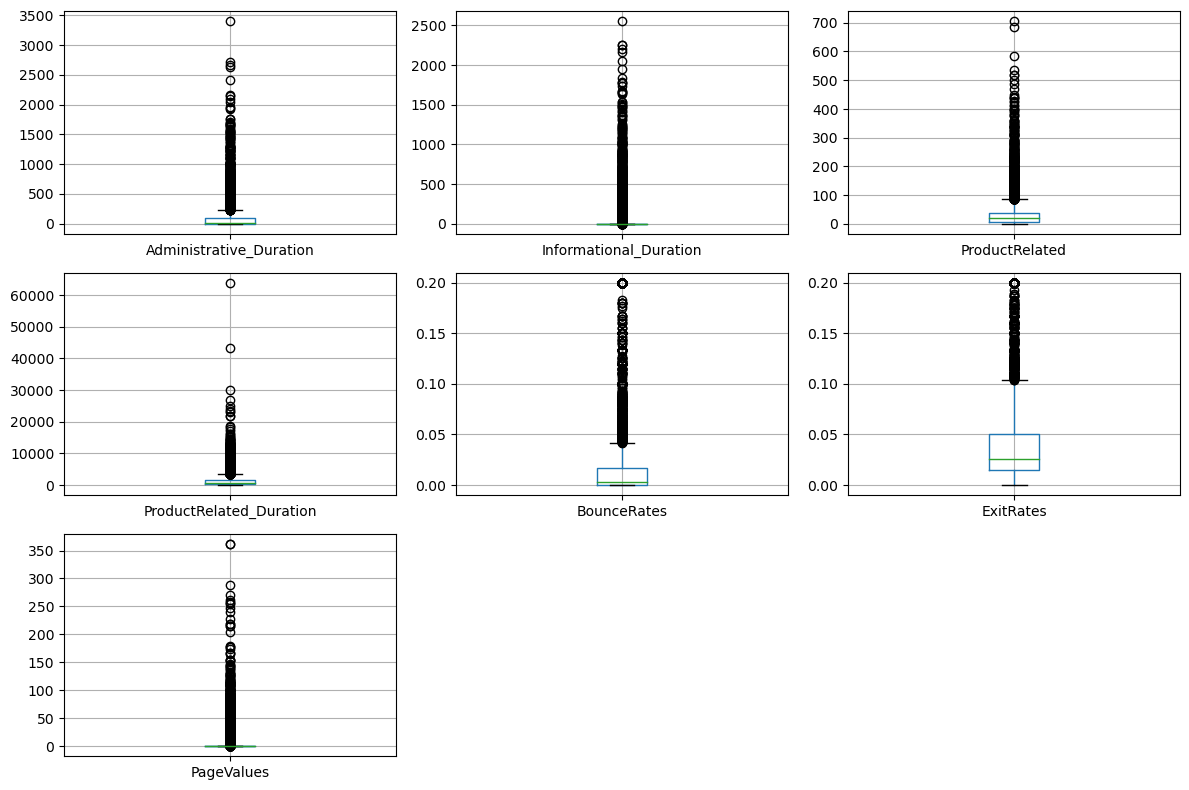

In [16]:
# Plot das variáveis contínuas

# Tamanho da área de plotagem
fig = plt.figure(figsize=(12,8))

# Loop pelas variáveis contínuas
for i, col in enumerate(continuous):
    plt.subplot(3,3,i+1)
    df.boxplot(col)
    plt.tight_layout()

plt.savefig("boxplot1.png")

Variáveis contínuas parecem extremamente distorcidas. Vamos aplicar transformação de log para melhorar a visualização

In [17]:
# Transformação de log nas variáveis contínuas
df[continuous] = np.log1p(1+df[continuous])

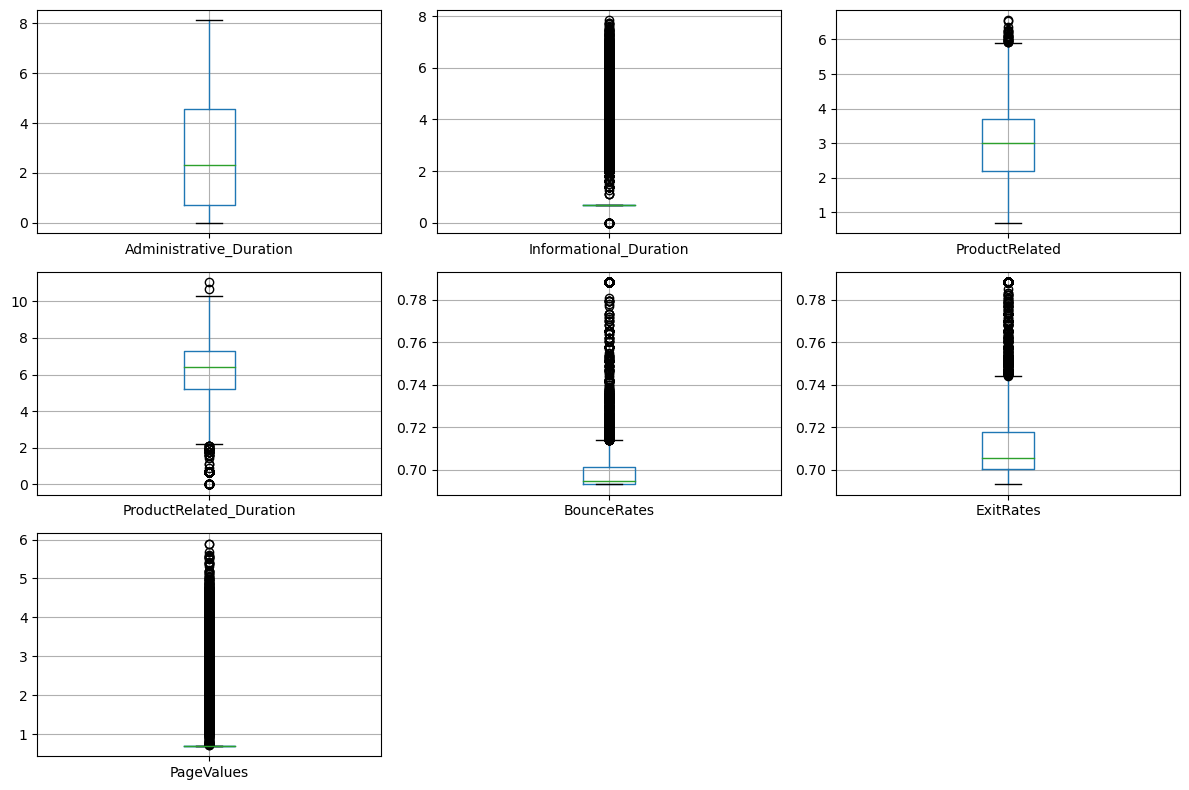

In [18]:
# Plot das variáveis contínuas

# Tamanho da área de plotagem
fig = plt.figure(figsize=(12,8))

# Loop pelas variáveis contínuas
for i, col in enumerate(continuous):
    plt.subplot(3,3,i+1)
    df.boxplot(col)
    plt.tight_layout()
    
plt.savefig("boxplot2.png")

Matriz de correlação entre variáveis contínuas

<AxesSubplot:>

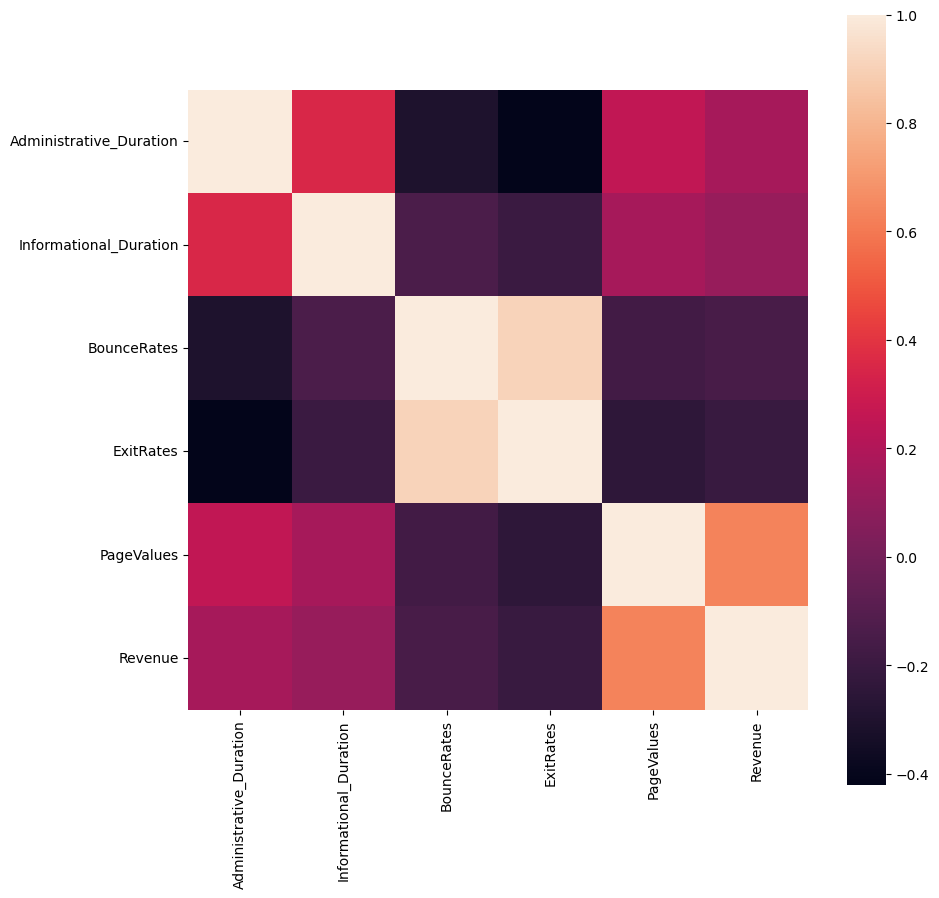

In [19]:
# Área de plotagem
plt.figure(figsize=(10,10))

# Matriz de correlação
sns.heatmap(df[["Administrative_Duration",
               "Informational_Duration",
               "BounceRates",
               "ExitRates",
               "PageValues",
               "Revenue"]].corr(), vmax=1., square=True)

Visualização de gráficos de variáveis categóricas para analisar como a variável de destino é infuenciada por elas.

<AxesSubplot:title={'center':'Venda ou não'}, xlabel='Revenue', ylabel='count'>

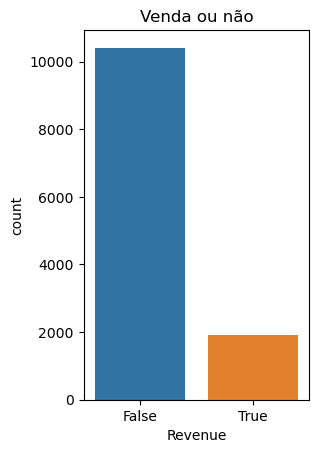

In [20]:
# Countplot Venda ou não
plt.subplot(1,2,2)
plt.title("Venda ou não")
sns.countplot(df["Revenue"])

<AxesSubplot:xlabel='VisitorType', ylabel='count'>

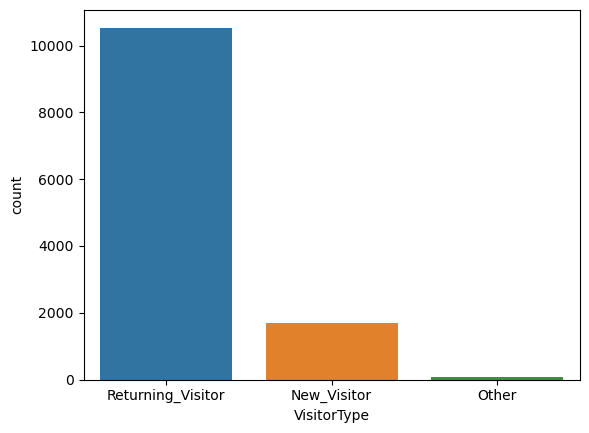

In [21]:
# Countplot tipo de visitante
plt.xlabel("Tipo de Visitante")
sns.countplot(df["VisitorType"])

<AxesSubplot:xlabel='VisitorType'>

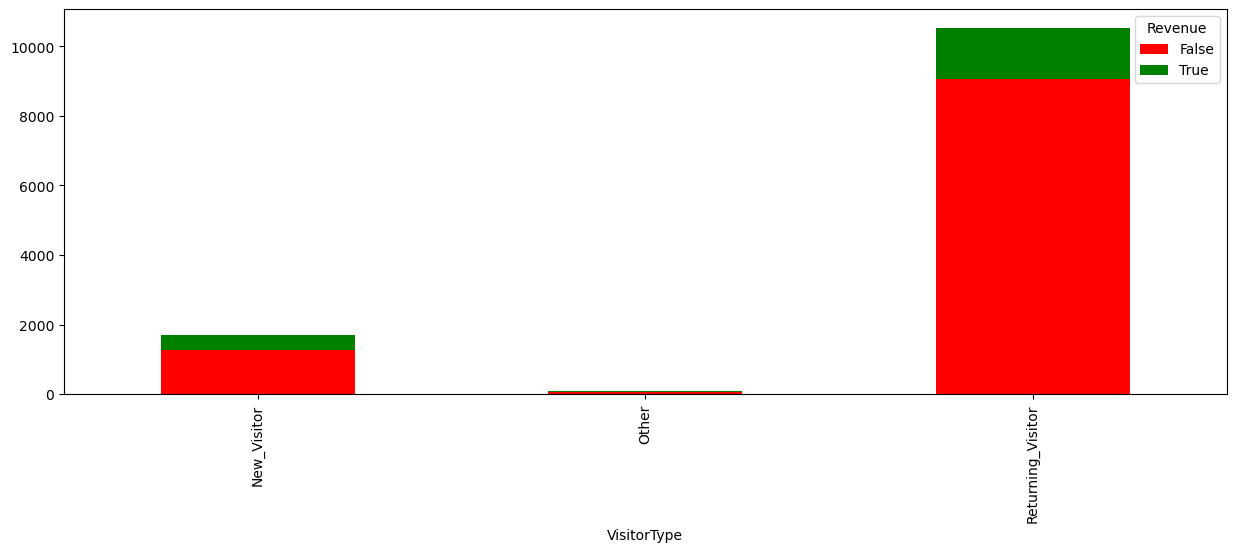

In [22]:
# Stacked Bar tipo de Visitante x Revenue
pd.crosstab(df["VisitorType"], df["Revenue"]).plot(kind="bar",
                                                  stacked=True,
                                                  figsize=(15,5),
                                                  color=["red","green"])

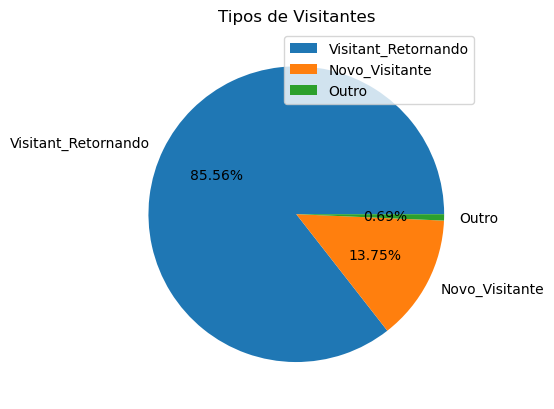

In [23]:
# Pie chart tipos de visitantes
labels = ["Visitant_Retornando", "Novo_Visitante", "Outro"]
plt.title("Tipos de Visitantes")
plt.pie(df["VisitorType"].value_counts(), labels=labels, autopct="%.2f%%")
plt.legend();

<AxesSubplot:title={'center':'Final de semana ou não'}, xlabel='Weekend', ylabel='count'>

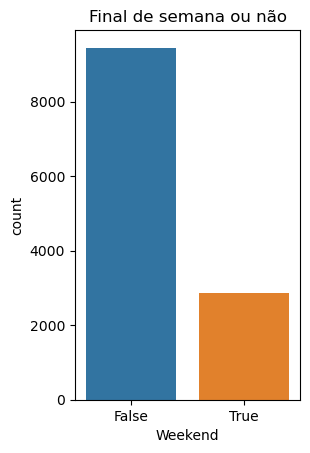

In [24]:
# Countplto Final de semana ou não
plt.subplot(1,2,1)
plt.title("Final de semana ou não")
sns.countplot(df["Weekend"])

<AxesSubplot:xlabel='Weekend'>

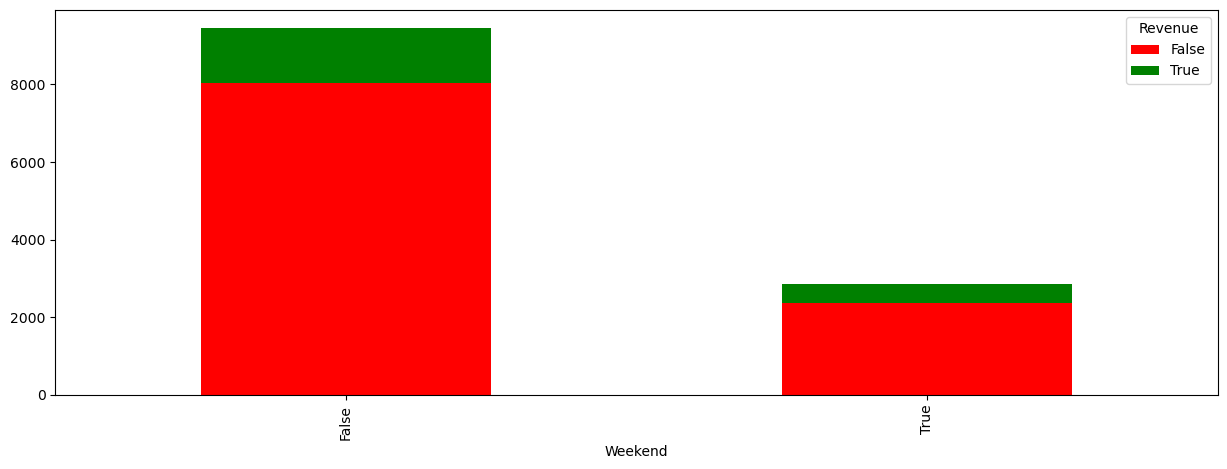

In [25]:
# Stacked bar Final de semana x Revenue
pd.crosstab(df["Weekend"], df["Revenue"]).plot(kind = "bar",
                                              stacked = True,
                                              figsize=(15,5),
                                              color = ["red", "green"])

<AxesSubplot:title={'center':'Tipos de sistemas operacionais'}, xlabel='OperatingSystems', ylabel='count'>

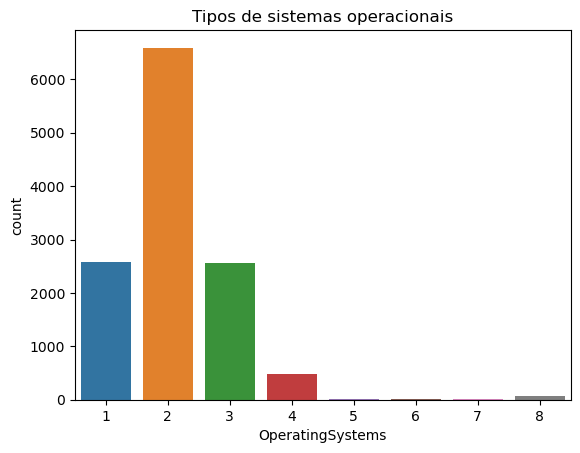

In [26]:
# Countplot tipos de sistemas operacionais
#plt.figure(figsize=(15,6))
plt.title("Tipos de sistemas operacionais")
plt.xlabel("Sistema operaiconal usado")
sns.countplot(df["OperatingSystems"])

<AxesSubplot:xlabel='OperatingSystems'>

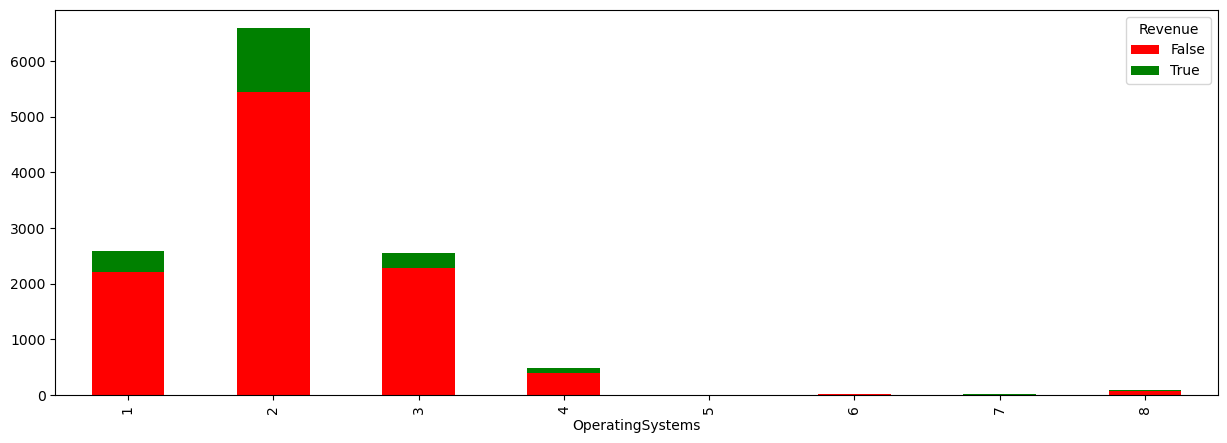

In [27]:
# Stacked Bar tipo de SO x Revenue
pd.crosstab(df["OperatingSystems"],df["Revenue"]).plot(kind="bar",
                                                      stacked = True,
                                                      figsize = (15,5),
                                                       color = ["red","green"])

<AxesSubplot:title={'center':'Tipos de Tráfego'}, xlabel='TrafficType', ylabel='count'>

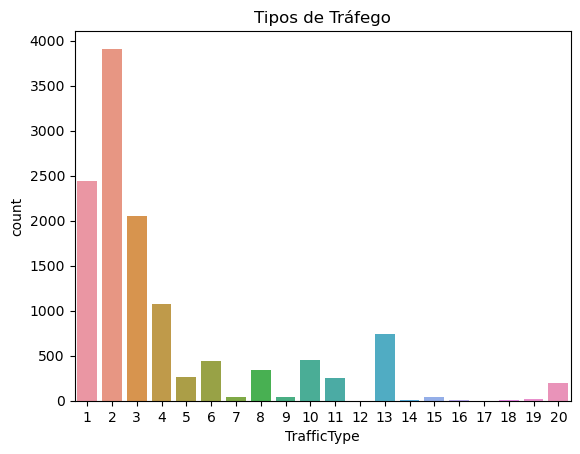

In [28]:
# Countplot Tipo de tráfego
plt.title("Tipos de Tráfego")
plt.xlabel("Tipo de tráfego")
sns.countplot(df["TrafficType"])

<AxesSubplot:xlabel='TrafficType'>

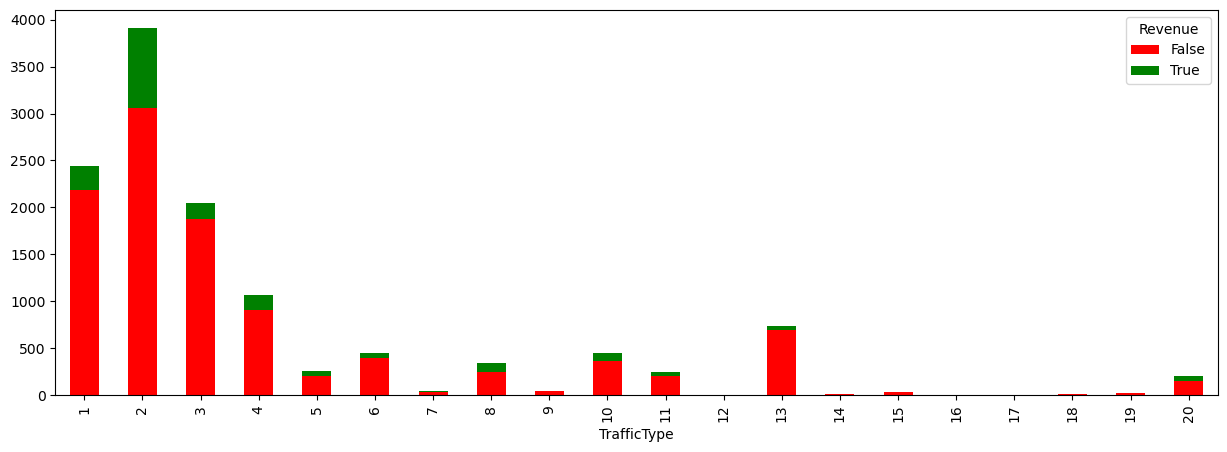

In [29]:
# Stacked bar tipos de tráfego x revenue
pd.crosstab(df["TrafficType"], df["Revenue"]).plot(kind = "bar",
                                                  stacked = True,
                                                  figsize=(15,5),
                                                  color = ["red","green"])

## Pré-processamento dos Dados

In [30]:
df_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [31]:
# Cria o encoder
lb = LabelEncoder()

# Aplica o encoder nas variáveis que estão com string
df_original["Month"] = lb.fit_transform(df_original["Month"])
df_original["VisitorType"] = lb.fit_transform(df["VisitorType"])

# Remove valores missing eventualmente gerados
df_original.dropna(inplace=True)

In [32]:
df_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,True,False


In [33]:
# Shape
df_original.shape

(12316, 18)

In [34]:
# Verificando se a variável resposta está balanceada
target_count = df_original.Revenue.value_counts()
target_count

False    10408
True      1908
Name: Revenue, dtype: int64

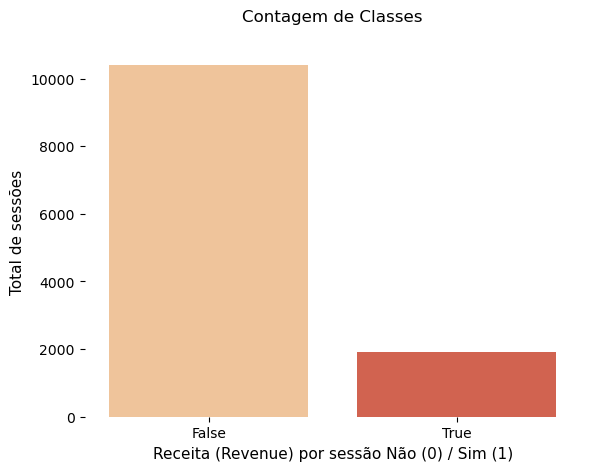

In [35]:
# Plot
sns.countplot(df_original.Revenue, palette = "OrRd")
plt.box(False)
plt.xlabel("Receita (Revenue) por sessão Não (0) / Sim (1)", fontsize = 11)
plt.ylabel("Total de sessões", fontsize = 11)
plt.title("Contagem de Classes\n")
plt.show()

In [36]:
# Instala e importa o pacote imblearn
!pip install -q imblearn
import imblearn

In [37]:
# Versões dos pacotes usado neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

sklearn   : 1.0.2
imblearn  : 0.0
seaborn   : 0.11.2
matplotlib: 3.5.2
numpy     : 1.21.5
pandas    : 1.4.4



In [38]:
# Shape
df_original.shape

(12316, 18)

In [39]:
# Variáveis explicativas
df_original.iloc[:,0:17].head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,True


In [40]:
# Variável target
df_original.iloc[:,17].head()

0    False
1    False
2    False
3    False
4    False
Name: Revenue, dtype: bool

Balanceamento da classe - Oversampling

In [42]:
# importa a função
from imblearn.over_sampling import SMOTE

# Seed para reproduzir o memso resultado
seed = 100

# Separa X e y
X = df_original.iloc[:,0:17]
y = df_original.iloc[:,17]

# Cria o balanceador SMOTE
smote_bal = SMOTE(random_state = seed)

# Aplica o balanceador
X_res, y_res = smote_bal.fit_resample(X,y)

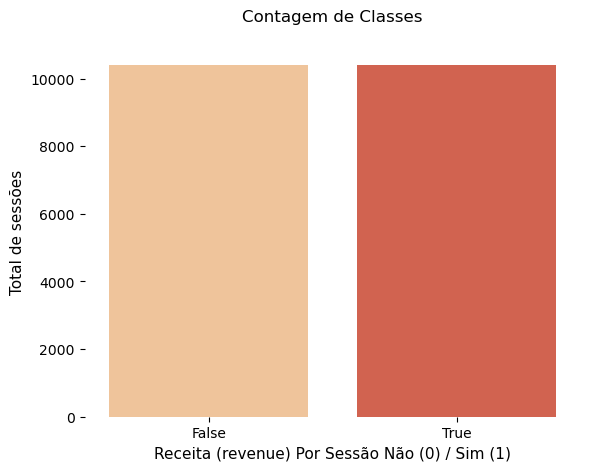

In [43]:
# Plot
sns.countplot(y_res, palette="OrRd")
plt.box(False)
plt.xlabel("Receita (revenue) Por Sessão Não (0) / Sim (1)", fontsize = 11)
plt.ylabel("Total de sessões", fontsize=11)
plt.title("Contagem de Classes\n")
plt.show()

In [44]:
# Ajustando X e y
X = X_res
y = y_res

In [45]:
# Divisão em dados de Treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, test_size=0.3, random_state=42)

# SVM

# Modelo Base com Kernel Linear

In [46]:
# Cria o modelo
modelo_v1 = svm.SVC(kernel="linear")

In [49]:
# Treinamento 
start = time.time()
modelo_v1.fit(X_treino, y_treino)
end = time.time()
print("Tempo de treinamento do modelo:", end - start)

Tempo de treinamento do modelo: 2246.1885318756104


In [51]:
# Previsões
previsoes_v1 = modelo_v1.predict(X_teste)

In [52]:
# Dicionário de métricar e metadados
SVM_dict_v1 = {"Modelo": "SMV",
              "Versão": "1",
              "kernel": "Linear",
              "Precision": precision_score(previsoes_v1, y_teste),
              "Recall": recall_score(previsoes_v1, y_teste),
              "F1 Score": f1_score(previsoes_v1, y_teste),
              "Acurácia": accuracy_score(previsoes_v1, y_teste),
              "AUC": roc_auc_score(y_teste, previsoes_v1)}

In [54]:
# Print
print("Métricas em Teste: \n")
SVM_dict_v1

Métricas em Teste: 



{'Modelo': 'SMV',
 'Versão': '1',
 'kernel': 'Linear',
 'Precision': 0.8672370088719898,
 'Recall': 0.795177222545032,
 'F1 Score': 0.8296453470748711,
 'Acurácia': 0.8200160128102482,
 'AUC': 0.8195039042417572}

## Modelo com Kernel Linear e Dados Padronizados (Scaled)

In [58]:
# Padronização
X_treino_scaled = StandardScaler().fit_transform(X_treino)
X_teste_scaled = StandardScaler().fit_transform(X_teste)

In [59]:
# Cria o modelo
modelo_v2 = svm.SVC(kernel = "linear")

In [60]:
# Treinamento
start = time.time()
modelo_v2.fit(X_treino_scaled, y_treino)
end = time.time()
print("Tempo de treinamento do Modelo:", end - start)

Tempo de treinamento do Modelo: 4.0959694385528564


In [61]:
# Previsões
previsoes_v2 = modelo_v2.predict(X_teste_scaled)

In [81]:
# Dicionário de métricas e metadados
SVM_dict_v2 = {"Modelo": "SMV",
              "Versão": "2",
              "kernel": "Linear com dados padronizados",
              "Precision": precision_score(previsoes_v2, y_teste),
              "Recall": recall_score(previsoes_v2, y_teste),
              "F1 Score": f1_score(previsoes_v2, y_teste),
              "Acurácia": accuracy_score(previsoes_v2, y_teste),
              "AUC": roc_auc_score(y_teste, previsoes_v2)}

In [82]:
# Print
print("Métricas em Teste:\n")
SVM_dict_v2

Métricas em Teste:



{'Modelo': 'SMV',
 'Versão': '2',
 'kernel': 'Linear com dados padronizados',
 'Precision': 0.7867553865652726,
 'Recall': 0.8912419239052405,
 'F1 Score': 0.8357455402221474,
 'Acurácia': 0.843714971977582,
 'AUC': 0.8443326949012832}

## Otimização de Hiperparâmetros com Grid Search e Kernel RBF

In [67]:
# Cria o modelo
modelo_v3 = svm.SVC(kernel = "rbf")

# Valores para o grid
C_range = np.array([50., 100., 200.])
gamma_range = np.array([0.3*0.001, 0.001,3*0.001])

# Grid de Hiperparâmetros
svm_param_grid = dict(gamma = gamma_range, C = C_range)

# Grid Search
start = time.time()
modelo_v3_grid_search_rbf = GridSearchCV(modelo_v3, svm_param_grid, cv = 3)

# Treinamento
modelo_v3_grid_search_rbf.fit(X_treino_scaled, y_treino)
end = time.time()
print("Tempo de treinamento do modelo com grid search:", end - start)

# Acurácia
print(f"Acurácia em Treinamento: {modelo_v3_grid_search_rbf.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideias: {modelo_v3_grid_search_rbf.best_params_}")

Tempo de treinamento do modelo com grid search: 59.77341294288635
Acurácia em Treinamento: 87.41%

Hiperparâmetros Ideias: {'C': 200.0, 'gamma': 0.003}


In [68]:
# Previsões
previsoes_v3 = modelo_v3_grid_search_rbf.predict(X_teste_scaled)

In [83]:
# Dicionário de métricas e metadados
SVM_dict_v3 = {"Modelo": "SMV",
              "Versão": "3",
              "kernel": "RBF com dados padronizados",
              "Precision": precision_score(previsoes_v3, y_teste),
              "Recall": recall_score(previsoes_v3, y_teste),
              "F1 Score": f1_score(previsoes_v3, y_teste),
              "Acurácia": accuracy_score(previsoes_v3, y_teste),
              "AUC": roc_auc_score(y_teste, previsoes_v3)}

In [84]:
# Print
print("Métricas em Teste:\n")
SVM_dict_v3

Métricas em Teste:



{'Modelo': 'SMV',
 'Versão': '3',
 'kernel': 'RBF com dados padronizados',
 'Precision': 0.8368187579214195,
 'Recall': 0.8986049676760803,
 'F1 Score': 0.8666119770303528,
 'Acurácia': 0.8698158526821457,
 'AUC': 0.8701737039849895}

## Otimização de Hiperparâmetros com Grid Search e Kernel Polinomial

In [75]:
# Cria o modelo
modelo_v4 = svm.SVC(kernel = "poly")

# Valores par ao grid
r_range = np.array([0.5,1])
gamma_range = np.array([0.001,0.01])
d_range = np.array([2,3,4])

# Grid de hiperparâmetros
param_grid_poly = dict(gamma = gamma_range, degree = d_range, coef0 = r_range)

# Grid Search
start = time.time()
modelo_v4_grid_search_poly = GridSearchCV(modelo_v4, param_grid_poly, cv = 3)

# Treinamento
modelo_v4_grid_search_poly.fit(X_treino_scaled, y_treino)
end = time.time()
print("Tempo de treinamento do modelo com grid search:", end - start)

# Acurácia
print(f"Acurácia em treinamento: {modelo_v4_grid_search_poly.best_score_: .2%}")
print("")
print(f"Hiperparâmetros ideias: {modelo_v4_grid_search_poly.best_params_}")

Tempo de treinamento do modelo com grid search: 63.771345138549805
Acurácia em treinamento:  86.14%

Hiperparâmetros ideias: {'coef0': 1.0, 'degree': 4, 'gamma': 0.01}


In [77]:
# Previsões
previsoes_v4 = modelo_v4_grid_search_poly.predict(X_teste_scaled)

In [85]:
# Dicionário de métricas e metadados
SVM_dict_v4 = {"Modelo": "SMV",
              "Versão": "4",
              "kernel": "Polinomial com dados padronizados",
              "Precision": precision_score(previsoes_v4, y_teste),
              "Recall": recall_score(previsoes_v4, y_teste),
              "F1 Score": f1_score(previsoes_v4, y_teste),
              "Acurácia": accuracy_score(previsoes_v4, y_teste),
              "AUC": roc_auc_score(y_teste, previsoes_v4)}

In [86]:
# Print
print("Métricas em Teste:\n")
SVM_dict_v4

Métricas em Teste:



{'Modelo': 'SMV',
 'Versão': '4',
 'kernel': 'Polinomial com dados padronizados',
 'Precision': 0.80893536121673,
 'Recall': 0.8932820153953814,
 'F1 Score': 0.8490189557698703,
 'Acurácia': 0.8546036829463571,
 'AUC': 0.8550989528647587}

In [87]:
# Concatena todos os dicinários em um dataframe do Pandas
resumo = pd.DataFrame({"SVM_dict_v1":pd.Series(SVM_dict_v1),
                      "SVM_dict_v2":pd.Series(SVM_dict_v2),
                      "SVM_dict_v3":pd.Series(SVM_dict_v3),
                      "SVM_dict_v4":pd.Series(SVM_dict_v4)})

In [88]:
# Print
resumo

,SVM_dict_v1,SVM_dict_v2,SVM_dict_v3,SVM_dict_v4
Modelo,SMV,SMV,SMV,SMV
Versão,1,2,3,4
kernel,Linear,Linear com dados padronizados,RBF com dados padronizados,Polinomial com dados padronizados
Precision,0.867237,0.786755,0.836819,0.808935
Recall,0.795177,0.891242,0.898605,0.893282
F1 Score,0.829645,0.835746,0.866612,0.849019
Acurácia,0.820016,0.843715,0.869816,0.854604
AUC,0.819504,0.844333,0.870174,0.855099


## Fazendo previsões com o modelo treinado

In [92]:
# Novo registro
novo_x = np.array([4.0,5.56,1.0,3.78,2.995,6.00,0.69,0.70,0.69,0,6,1,1,3,3,2,False]).reshape(1,-1)

In [93]:
# Padronizando o resgistro
novo_x_scaled = StandardScaler().fit_transform(novo_x)

In [94]:
# Previsões
previsao_novo_x = modelo_v3_grid_search_rbf.predict(novo_x_scaled)

In [95]:
previsao_novo_x

array([ True])

# FIM